# Working with complicated dataset

Your name: Rahul Champaneria

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [128]:
import pandas as pd
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv"

response = requests.get(url)
lines = response.text.splitlines()

fields_line = next(line for line in lines if "# Fields:" in line)
fields = [
    field.strip('"').strip().split(",")[0]
    for field in fields_line.replace("# Fields:", "").strip().split(", ")
]

fields[-1] = fields[-1].replace(",", "").strip()

data_as_file = StringIO("\n".join(lines))

df = pd.read_csv(data_as_file, comment="#", header=None)

if len(df.columns) < len(fields):
    while len(df.columns) < len(fields):
        df[len(df.columns)] = None
elif len(df.columns) > len(fields):
    df = df.iloc[:, :len(fields)]

df.columns = fields

df = df.drop(columns=["query acc.ver"]).set_index("subject acc.ver")
df = df.iloc[1:]

df


,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,"publications"""
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41
AHG32084.1,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"18,964",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318.0,23.0,0.0,1.0,318.0,1.0,318.0,0.0,551.0,97.48,"17,348",6
ASP44815.1,93.375,317.0,21.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,96.85,"7,105",19
YP_009414156.1,84.543,317.0,49.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,"18,940",37


### Question 2
What is the average number of publications?

In [129]:
### Your code here . . .
publications = df['publications"'].str.replace(",", "")

publications = pd.to_numeric(publications, errors="coerce")

average_publications = publications.mean()

print(f"Average of publications: {average_publications}")


Average of publications: 26.989690721649485


### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [130]:
### Your code here . . .
bonds = df['bonds'].str.replace(",", "").astype(int) > 15000
bonds = bonds[bonds == True]
bonds


,bonds
subject acc.ver,
AGK29621.1,True
AHG32084.1,True
6G2J_H,True
YP_002791042.1,True
AGK29634.1,True
0806162F,True
YP_009112408.1,True
YP_001876469.1,True
YP_009092269.1,True


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

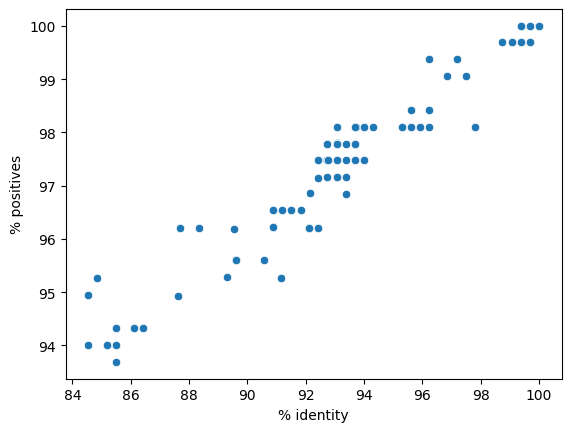

In [131]:
### Your code here . . .
import seaborn as sns
sns.scatterplot(data=df, x="% identity", y="% positives")
plt.show()

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [132]:
### Your code here . . .
df2 = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")

df["Protein source"] = df2.set_index("Protein")["Source"].reindex(df.index)
df

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,"publications""",Protein source
subject acc.ver,,,,,,,,,,,,,,
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9,RefSeq
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47,NaN
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13,GenPept
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41,NaN
AHG32084.1,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"18,964",3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ABX45285.1,92.767,318.0,23.0,0.0,1.0,318.0,1.0,318.0,0.0,551.0,97.48,"17,348",6,NaN
ASP44815.1,93.375,317.0,21.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,96.85,"7,105",19,NaN
YP_009414156.1,84.543,317.0,49.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,"18,940",37,GenPept
